In [1]:
# run evaluation
# !python getQualityScore_new.py --data_dir "./data" --datasets "XQLFW" --model_path "./pretrained_models" --backbone "iresnet50" --model_id "32572" --score_file_name "CRFIQAS.txt"

all_folders = [#"12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB",
               #"12-2024_SD21_LoRA4_alphaWNone_FacePortrait_Photo_Gender_Pose_BackgroundB_100samples",
               "01-2025_ID-Booth_ABLATION"
               #"tufts_512_poses_1-7_all_imgs_jpg_per_ID"
            ]
for fold in all_folders: 
    full_path = f"../../FR_DATASETS_ABLATION/{fold}"
    !python getQualityScore_FR_ID-Booth_12-2024.py --data_folder="" --data_dir=$full_path --model_path "./pretrained_models"  --datasets "" --backbone "iresnet50" --model_id "32572" --score_file_name "samples_CRFIQAS.txt"


/home/darian/miniconda3/envs/dgm_eval/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Do dataset: Base_NoNegPrompt
Number of images in total, before sampling: 10696
Sample it
Number of images, after sample: 10000
Get batch feature
100%|█████████████████████████████████████████| 625/625 [00:07<00:00, 83.58it/s]
Write scores to RESULTS_ID-Booth_FR_CRFIQA_12-2024/01-2025_ID-Booth_ABLATION/Base_NoNegPrompt.txt
Do dataset: +Background_NoNegPrompt
Number of images in total, before sampling: 10636
Sample it
Number of images, after sample: 10000
Get batch feature
100%|█████████████████████████████████████████| 625/625 [00:06<00:00, 91.16it/s]
Write scores to RESULTS_ID-Booth_FR_CRFIQA_12-2024/01-2025_ID-Booth_ABLATION/+Background_NoNegPrompt.txt
Do dataset: missing_images.json
Do dataset: Base_prompt
Numbe

### CR-FIQA of real datasets

In [5]:
real_folders = [#"tufts_512_poses_1-7_all_imgs_jpg_per_ID", 
            "FFHQ_512",
            #"LFW_bench"
            ]

for fold in real_folders: 
    full_path = f"../../ID-Booth/FR_DATASETS/{fold}"
    !python getQualityScore_FR_ID-Booth_12-2024.py --data_dir=$full_path --data_folder="" --model_path "./pretrained_models"  --datasets "" --backbone "iresnet50" --model_id "32572" --score_file_name "samples_CRFIQAS.txt"

# TODO ... use all images!
# 

Do dataset: images
Number of images in total, before sampling: 69991
Sample it
Number of images, after sample: 10000
Get batch feature
100%|█████████████████████████████████████████| 625/625 [00:20<00:00, 31.15it/s]
Write scores to ID-Booth_FR_CRFIQA_12-2024/FFHQ_512/images.txt
Do dataset: ArcFace_embeds


### Measure mean and std

In [2]:


# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  

def read_txt_file(txt_file_path):
    score_list = []
    with open(txt_file_path) as f:
        lines = f.readlines()
        #print(lines)

        # go over lines 
        for line in lines: 

            score = float(line.split(" ")[-1])
            # print(score)
            score_list.append(score)

    print(len(score_list))
    return score_list


import os 
        
import numpy as np 
import json 

# folder = "CR_FIQA_score_results/ArcFace_based"

# all_folders = [#"12-2024_SD21_LoRA4_alphaW0.1_Face",
#                "12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Environments",
#                #"tufts_512_poses_1-7_all_imgs_jpg_per_ID",
#                #"FFHQ_512"
#             ]

# all_folders = real_folders
main_folder = "RESULTS_ID-Booth_FR_CRFIQA_12-2024"
output_folder = main_folder + "_mean_std" #CRFIQA_scores_mean_std"

for i, fold in enumerate(all_folders): 
    folder = os.path.join(main_folder, fold)
    all_sets = os.listdir(folder)
    
    for j, dataset in enumerate(all_sets):
        print(dataset)
        if "BACK" in dataset:
            print("NOPE:")
            continue 
        
        txt_file_path = os.path.join(folder, dataset)
        print(txt_file_path)
        score_list = read_txt_file(txt_file_path)
        name_in_df = f"{fold}_{dataset}"
        df_tmp = pd.DataFrame({'Scores': score_list, 'Class': name_in_df})#dataset[:50]})
        
        #print(df_tmp)
        #break
        output_path = os.path.join(output_folder, fold)  
        os.makedirs(output_path, exist_ok=True)

        mean = np.round(df_tmp.loc[df_tmp['Class'] == name_in_df, 'Scores'].mean(), 3)
        std = np.round(df_tmp.loc[df_tmp['Class'] == name_in_df, 'Scores'].std(), 3)

        result = {"mean": mean, "std": std}

        print("SAVE_TO:", f"{os.path.basename(dataset)}.json")
        print(result)
        with open(os.path.join(output_path, f"{os.path.basename(dataset).split('.')[0]}.json"), "w") as outfile:
            json.dump(result, outfile, indent=4)
            print("==" * 30)
        

        if i == 0 and j == 0: 
            df = df_tmp
        else:
            df = pd.concat([df, df_tmp], ignore_index=True)


        #print("--" * 20)
    print("==" * 30)


+Background.txt
RESULTS_ID-Booth_FR_CRFIQA_12-2024/01-2025_ID-Booth_ABLATION/+Background.txt
10000
SAVE_TO: +Background.txt.json
{'mean': 2.158, 'std': 0.159}
Base_NoNegPrompt.txt
RESULTS_ID-Booth_FR_CRFIQA_12-2024/01-2025_ID-Booth_ABLATION/Base_NoNegPrompt.txt
10000
SAVE_TO: Base_NoNegPrompt.txt.json
{'mean': 2.136, 'std': 0.107}
+Background_NoNegPrompt.txt
RESULTS_ID-Booth_FR_CRFIQA_12-2024/01-2025_ID-Booth_ABLATION/+Background_NoNegPrompt.txt
10000
SAVE_TO: +Background_NoNegPrompt.txt.json
{'mean': 2.108, 'std': 0.175}
Base_prompt.txt
RESULTS_ID-Booth_FR_CRFIQA_12-2024/01-2025_ID-Booth_ABLATION/Base_prompt.txt
10000
SAVE_TO: Base_prompt.txt.json
{'mean': 2.171, 'std': 0.103}
no_new_Loss_NoPrior.txt
RESULTS_ID-Booth_FR_CRFIQA_12-2024/01-2025_ID-Booth_ABLATION/no_new_Loss_NoPrior.txt
10000
SAVE_TO: no_new_Loss_NoPrior.txt.json
{'mean': 2.079, 'std': 0.226}
+Background+Gender.txt
RESULTS_ID-Booth_FR_CRFIQA_12-2024/01-2025_ID-Booth_ABLATION/+Background+Gender.txt
10000
SAVE_TO: +Backgro

/home/darian/miniconda3/envs/dgm_eval/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df


,Scores,Class
0,2.203785,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
1,2.124944,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
2,2.269832,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
3,2.372450,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
4,2.243650,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
...,...,...
6695,2.241795,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
6696,2.298388,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
6697,2.014732,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
6698,2.262838,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...


In [5]:
df["Class"].unique()

array(['12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB_triplet_prior_loss_TimestepWeight.txt',
       '12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB_identity_loss_TimestepWeight.txt',
       '12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB_no_new_Loss.txt'],
      dtype=object)

In [6]:
df

,Scores,Class
0,2.203785,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
1,2.124944,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
2,2.269832,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
3,2.372450,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
4,2.243650,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
...,...,...
6695,2.241795,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
6696,2.298388,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
6697,2.014732,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
6698,2.262838,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...


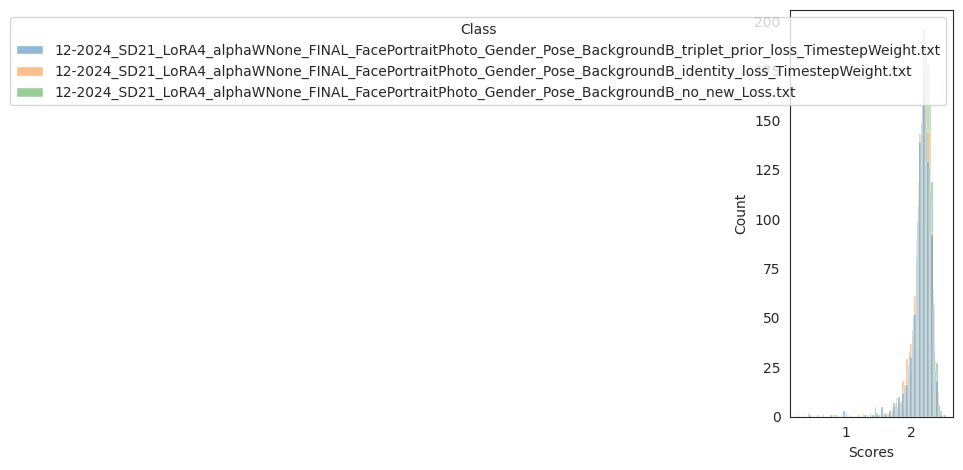

In [7]:
#print(df)
# sns.set(style="darkgrid")
sns.set_style("white")
sns.histplot(data=df, x="Scores", hue="Class", binwidth=0.02)
plt.tight_layout()
plt.show()


In [47]:
# sns.displot(df, x="Scores", kind="kde", fill=True)
# sns.displot(df, x="Scores", y="class", kind="kde", fill=True)

In [48]:
##########################################################################
import numpy as np 
def make_gray_area(a, axs, indices=[0], max_value=50, mode="normal"):    
    middle = np.mean(a)#.mean()
    sdev = np.std(a)
    left = middle - sdev
    right = middle + sdev

    tmp_range = np.arange(-10.0, 10.0, 0.01)

    axs[indices[0]].fill_between(tmp_range, 0, [max_value]*len(tmp_range), where=(left <= tmp_range) & (tmp_range <= right), facecolor='grey', alpha=0.2)

/tmp/ipykernel_2203708/1674827037.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=False, color='crimson', ax=ax)


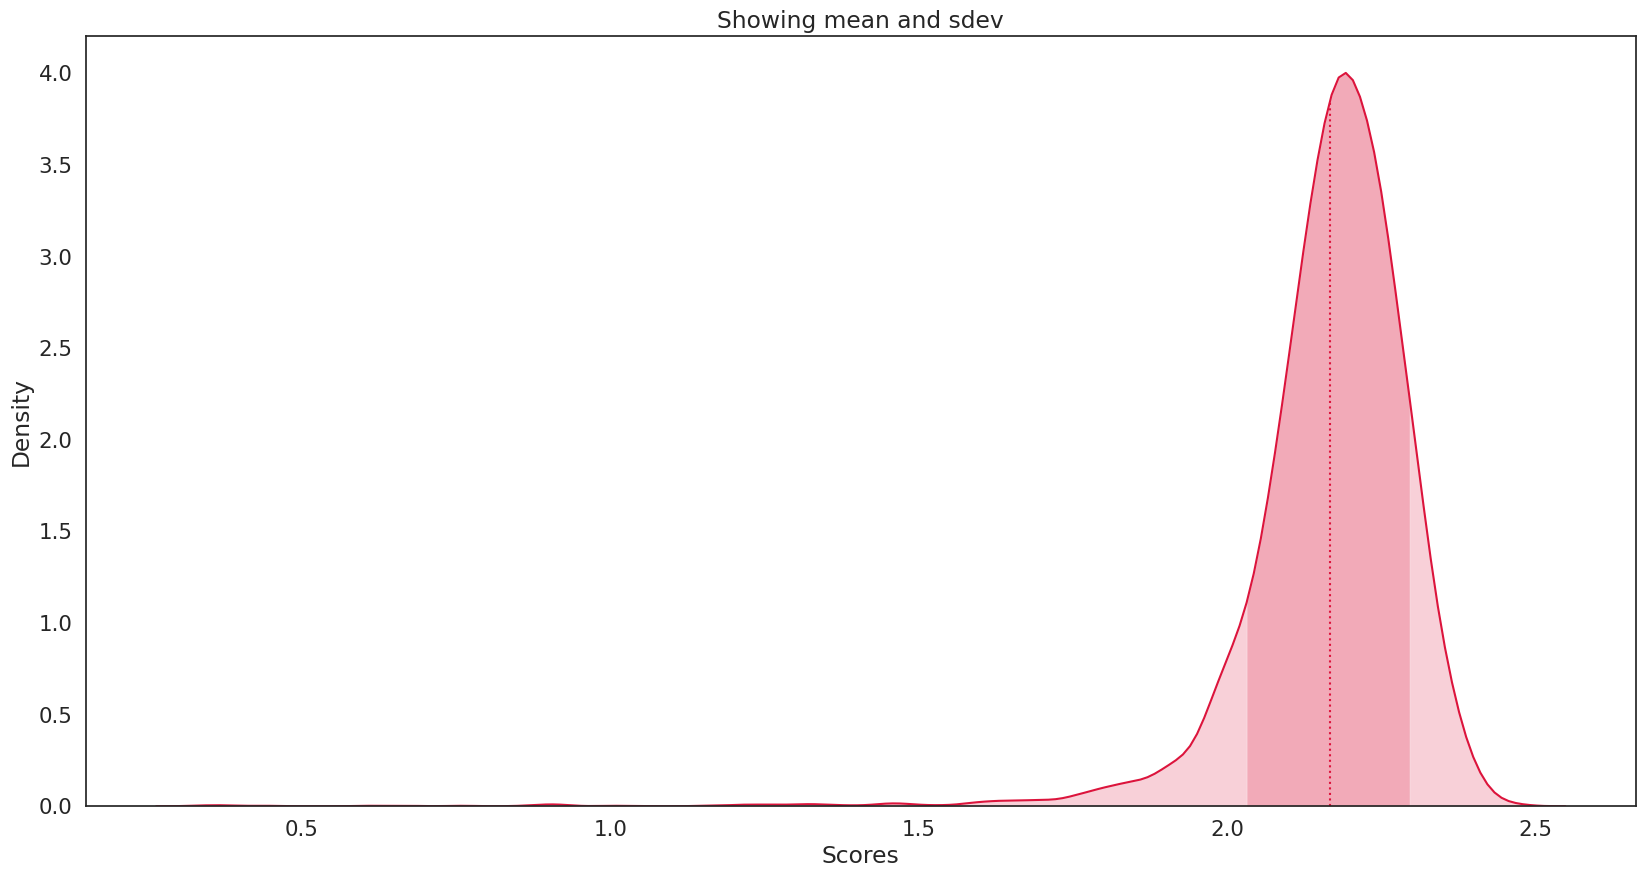

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = df["Scores"]
# x = np.random.normal(np.tile(np.random.uniform(10, 30, 5), 50), 3)
fig, ax = plt.subplots() # ncols=1)#, figsize=(10, 10))

sns.kdeplot(data, shade=False, color='crimson', ax=ax)
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

middle = data.mean()
sdev = data.std()
left = middle - sdev
right = middle + sdev
ax.set_title('Showing mean and sdev')

ax.vlines(middle, 0, np.interp(middle, xs, ys), color='crimson', ls=':')    
#axes[0].axvline(np.mean(data),color='black', linestyle='--',  linewidth=2)


ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
#ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='crimson', alpha=0.2)
# ax.set_ylim(ymin=0)
ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), facecolor='crimson', alpha=0.2)
# make_gray_area(df['Scores'], axes, max_value = 2.0)

plt.show()


In [50]:
df

,Scores,Class
0,2.239284,12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Enviro...
1,2.306908,12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Enviro...
2,2.269419,12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Enviro...
3,2.332998,12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Enviro...
4,2.249377,12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Enviro...
...,...,...
6720,2.174139,12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Enviro...
6721,2.360576,12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Enviro...
6722,2.199125,12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Enviro...
6723,2.231873,12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Enviro...


In [13]:
import numpy as np 

label_list = list(set(list(df.Class)))

# new_label_list = []
# for i in list(df.Class):
#     if i not in new_label_list: 
#         new_label_list.append(i)

# new_label_list

new_label_list = dict()
for i, label in enumerate(label_list): 
    mean = np.round(df.loc[df['Class'] == label, 'Scores'].mean(), 3)
    std = np.round(df.loc[df['Class'] == label, 'Scores'].std(), 3)
    # print(mean, std)
    
    new_label_list[label] = label + "\n(" + str(mean) + " $\pm$ " + str(std) + ")"
print(new_label_list)

{'12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB_identity_loss_TimestepWeight.txt': '12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB_identity_loss_TimestepWeight.txt\n(2.154 $\\pm$ 0.153)', '12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB_no_new_Loss.txt': '12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB_no_new_Loss.txt\n(2.189 $\\pm$ 0.123)', '12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB_triplet_prior_loss_TimestepWeight.txt': '12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB_triplet_prior_loss_TimestepWeight.txt\n(2.146 $\\pm$ 0.175)'}


In [14]:
# import numpy as np 
# import json 

# label_list = list(set(list(df.Class)))

# output_folder = "DB_CRFIQA_scores_mean_std"
# os.makedirs(output_folder, exist_ok=True)

# for i, label in enumerate(label_list): 
#     mean = np.round(df.loc[df['Class'] == label, 'Scores'].mean(), 3)
#     std = np.round(df.loc[df['Class'] == label, 'Scores'].std(), 3)

#     result = {"mean": mean, "std": std}

#     print("SAVE_TO:", f"{os.path.basename(label)}.json")

#     with open(os.path.join(output_folder, f"{os.path.basename(label)}.json"), "w") as outfile:
#         json.dump(result, outfile, indent=4)
#         print("==" * 30)
        


In [15]:
# change it in df instead 
df_new = df.__deepcopy__()

df_new = df_new.replace({"Class": new_label_list})
df_new
# df_new[df['Class'] == "Real Train."]['']

,Scores,Class
0,2.203785,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
1,2.124944,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
2,2.269832,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
3,2.372450,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
4,2.243650,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
...,...,...
6695,2.241795,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
6696,2.298388,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
6697,2.014732,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
6698,2.262838,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...


In [16]:
# for each in new label list ... compute mean 


In [17]:
df_new

,Scores,Class
0,2.203785,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
1,2.124944,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
2,2.269832,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
3,2.372450,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
4,2.243650,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
...,...,...
6695,2.241795,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
6696,2.298388,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
6697,2.014732,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...
6698,2.262838,12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortra...


In [18]:
# df[df.index.duplicated()]

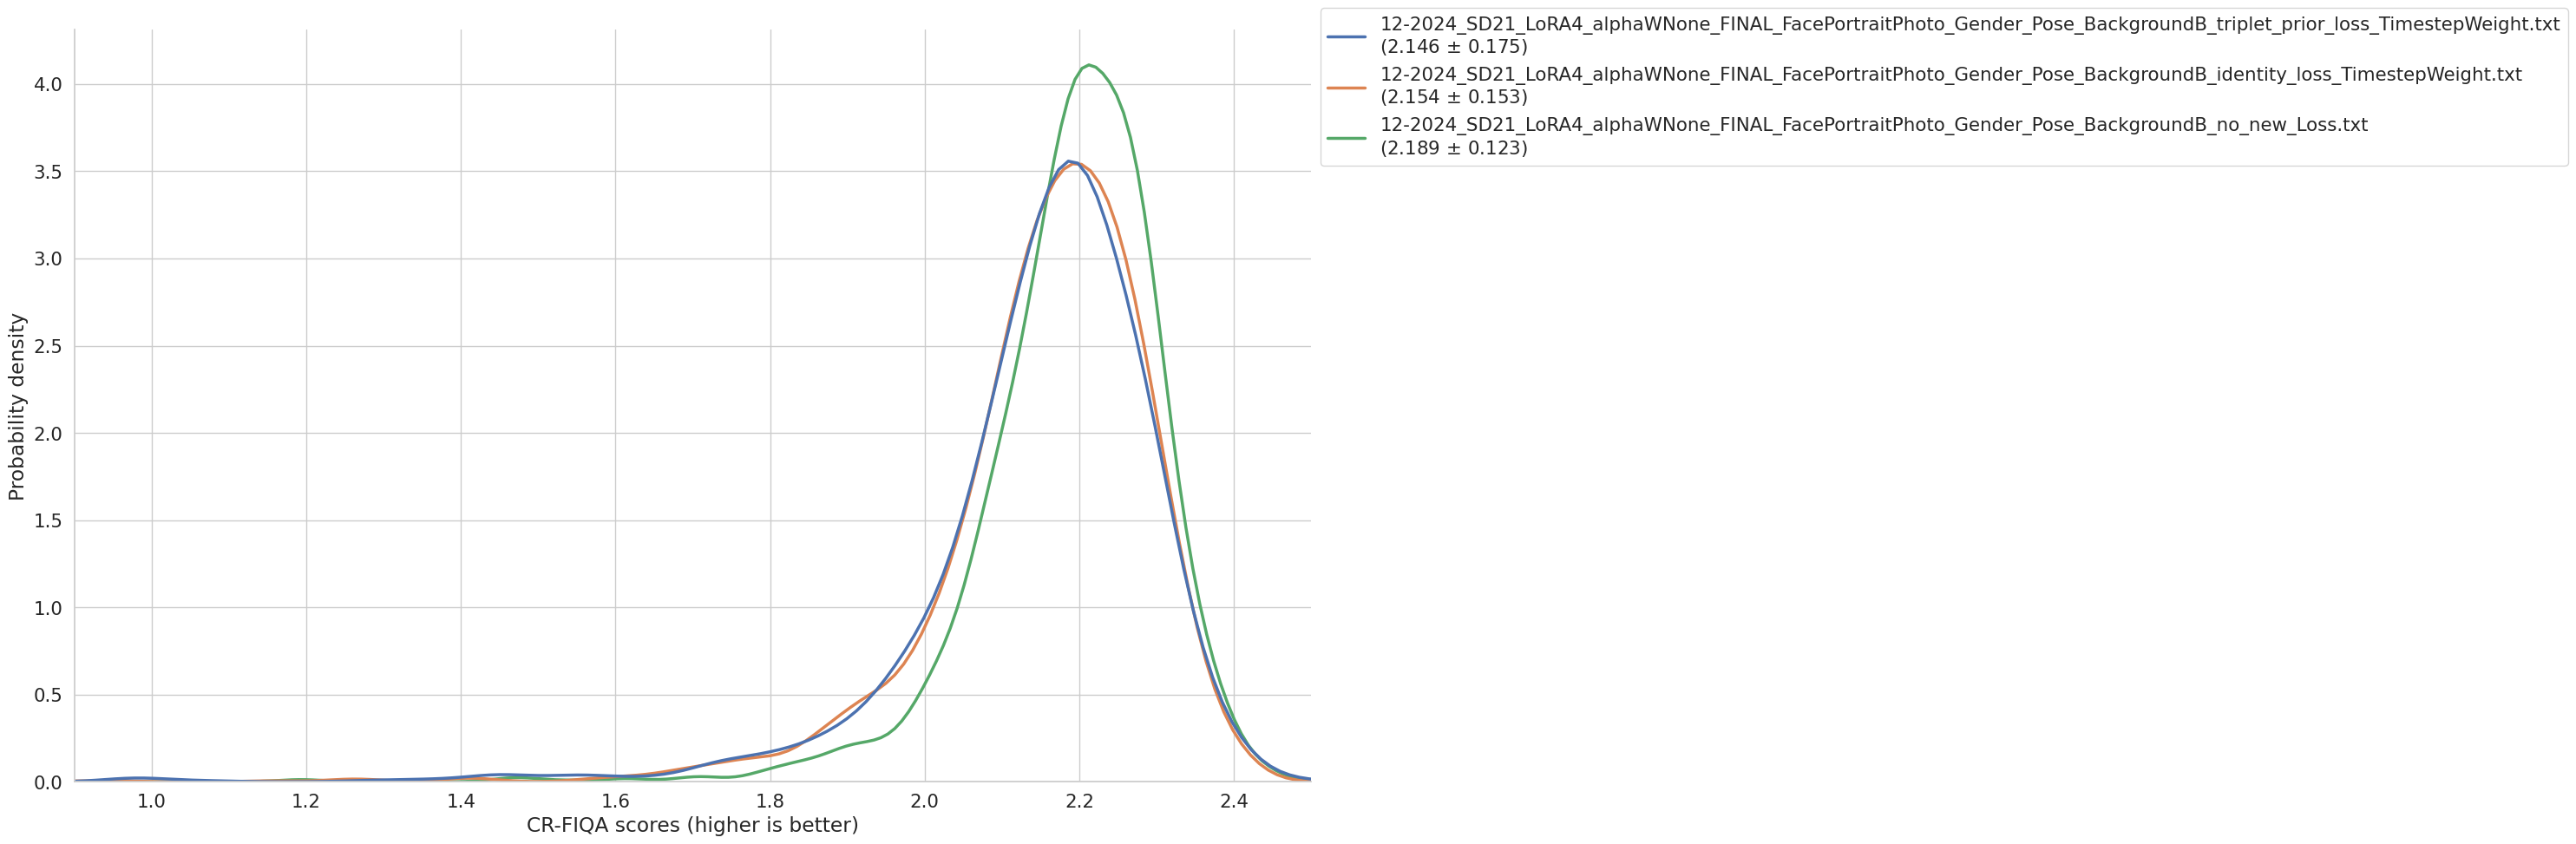

In [19]:
#fig, ax = plt.subplots(figsize=(10, 10))



sns.set(rc={'figure.figsize':(30,10)})

sns.set(font_scale=1.4)
# sns.set_context("paper", rc={"axes.titlesize":14})  
sns.set_style("whitegrid")

ax = sns.kdeplot(data=df_new, x="Scores", hue="Class",  common_norm=False, linewidth = 2.5)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.04))
sns.despine(right=True)

# ax.set(title='CR-FIQA score distributions')
ax.set(xlabel='CR-FIQA scores (higher is better)', ylabel='Probability density')
ax.legend_.set_title(None)# removes legend title 

# print(ax.legend.val)
# plt.legend(labels=new_label_list, bbox_to_anchor=(1, 1.04))#loc='upper center', bbox_to_anchor=(0.5, -0.747), ncol=2) 
# plt.legend(bbox_to_anchor=(1, 1.04))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim(0.9, 2.5)
# ax.set_ylim(0.0, 2.3)


fig = ax.get_figure()
fig.tight_layout()
# fig.savefig("DB_CRFIQAs_test.pdf") 


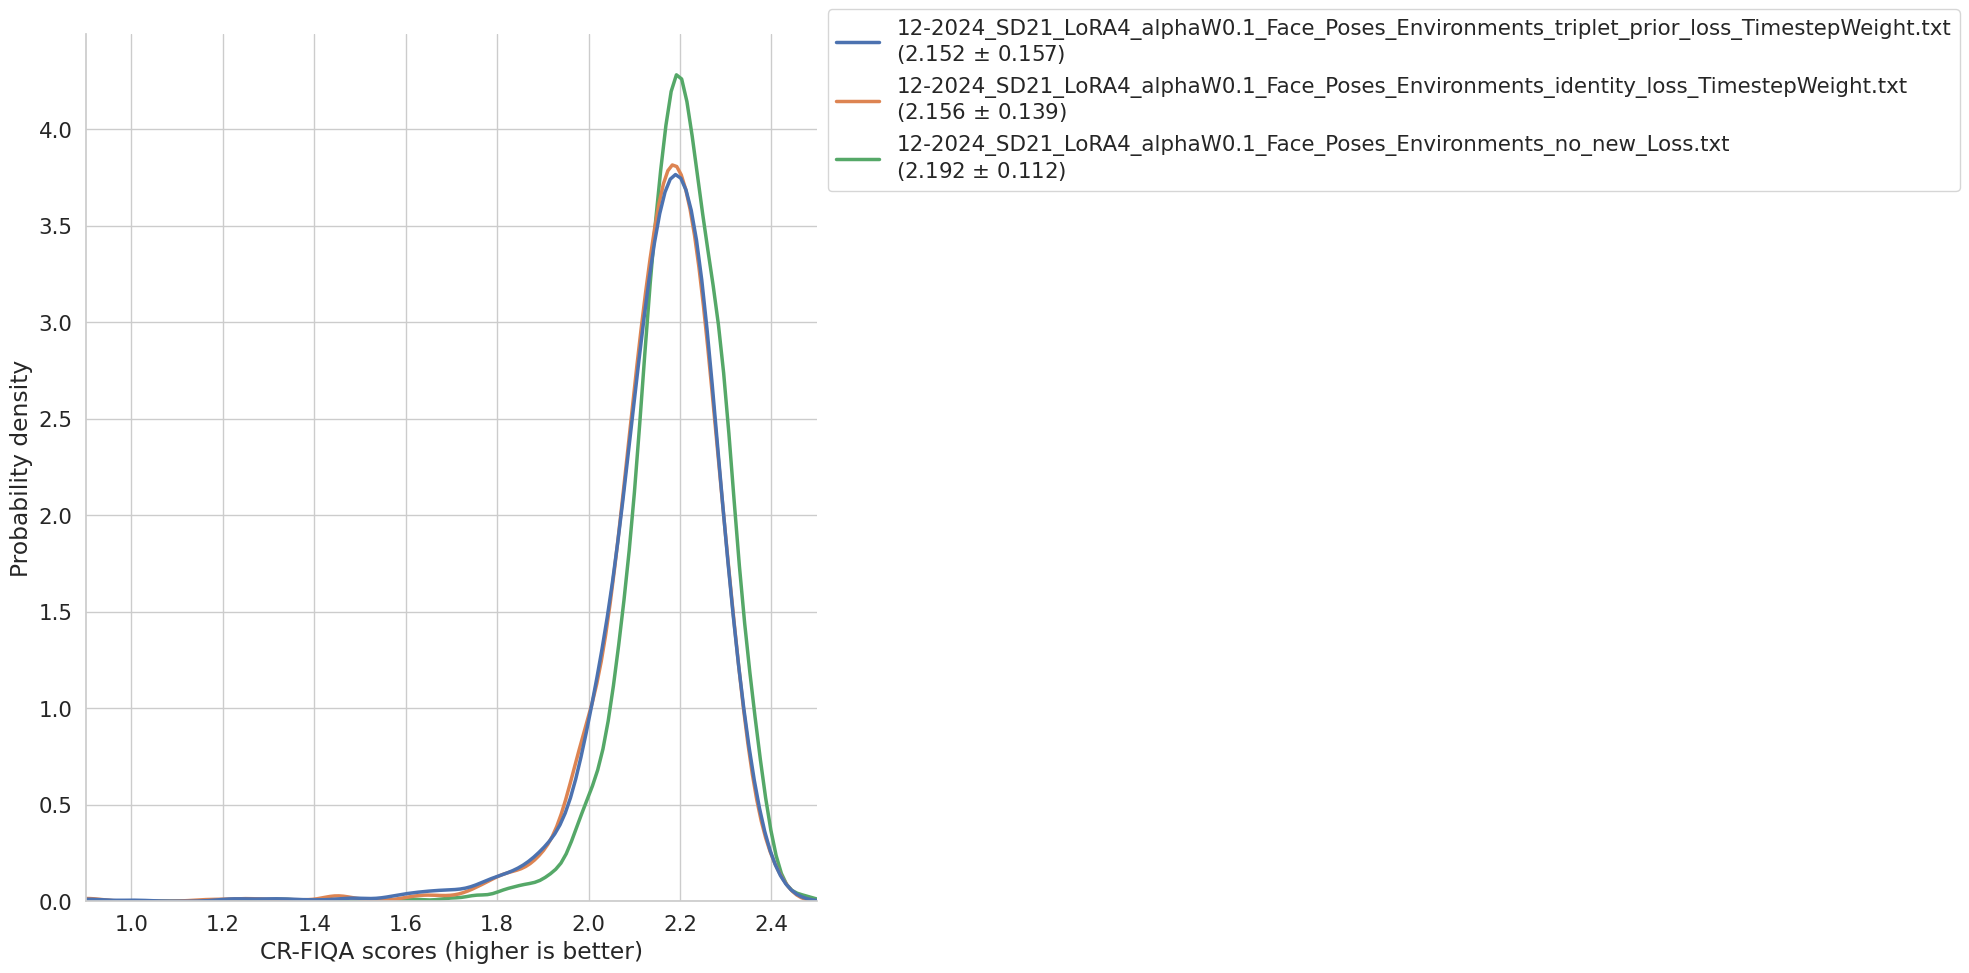

In [58]:
#fig, ax = plt.subplots(figsize=(10, 10))

sns.set(rc={'figure.figsize':(20,10)})

sns.set(font_scale=1.4)
# sns.set_context("paper", rc={"axes.titlesize":14})  
sns.set_style("whitegrid")

ax = sns.kdeplot(data=df_new, x="Scores", hue="Class",  common_norm=False, linewidth = 2.5)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.04))
sns.despine(right=True)

# ax.set(title='CR-FIQA score distributions')
ax.set(xlabel='CR-FIQA scores (higher is better)', ylabel='Probability density')
ax.legend_.set_title(None)# removes legend title 

# print(ax.legend.val)
# plt.legend(labels=new_label_list, bbox_to_anchor=(1, 1.04))#loc='upper center', bbox_to_anchor=(0.5, -0.747), ncol=2) 
# plt.legend(bbox_to_anchor=(1, 1.04))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim(0.9, 2.5)
# ax.set_ylim(0.0, 2.3)


fig = ax.get_figure()
fig.tight_layout()
# fig.savefig("cr_fiqa_kde_plot_new.pdf") 




/tmp/ipykernel_9231/1665112546.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


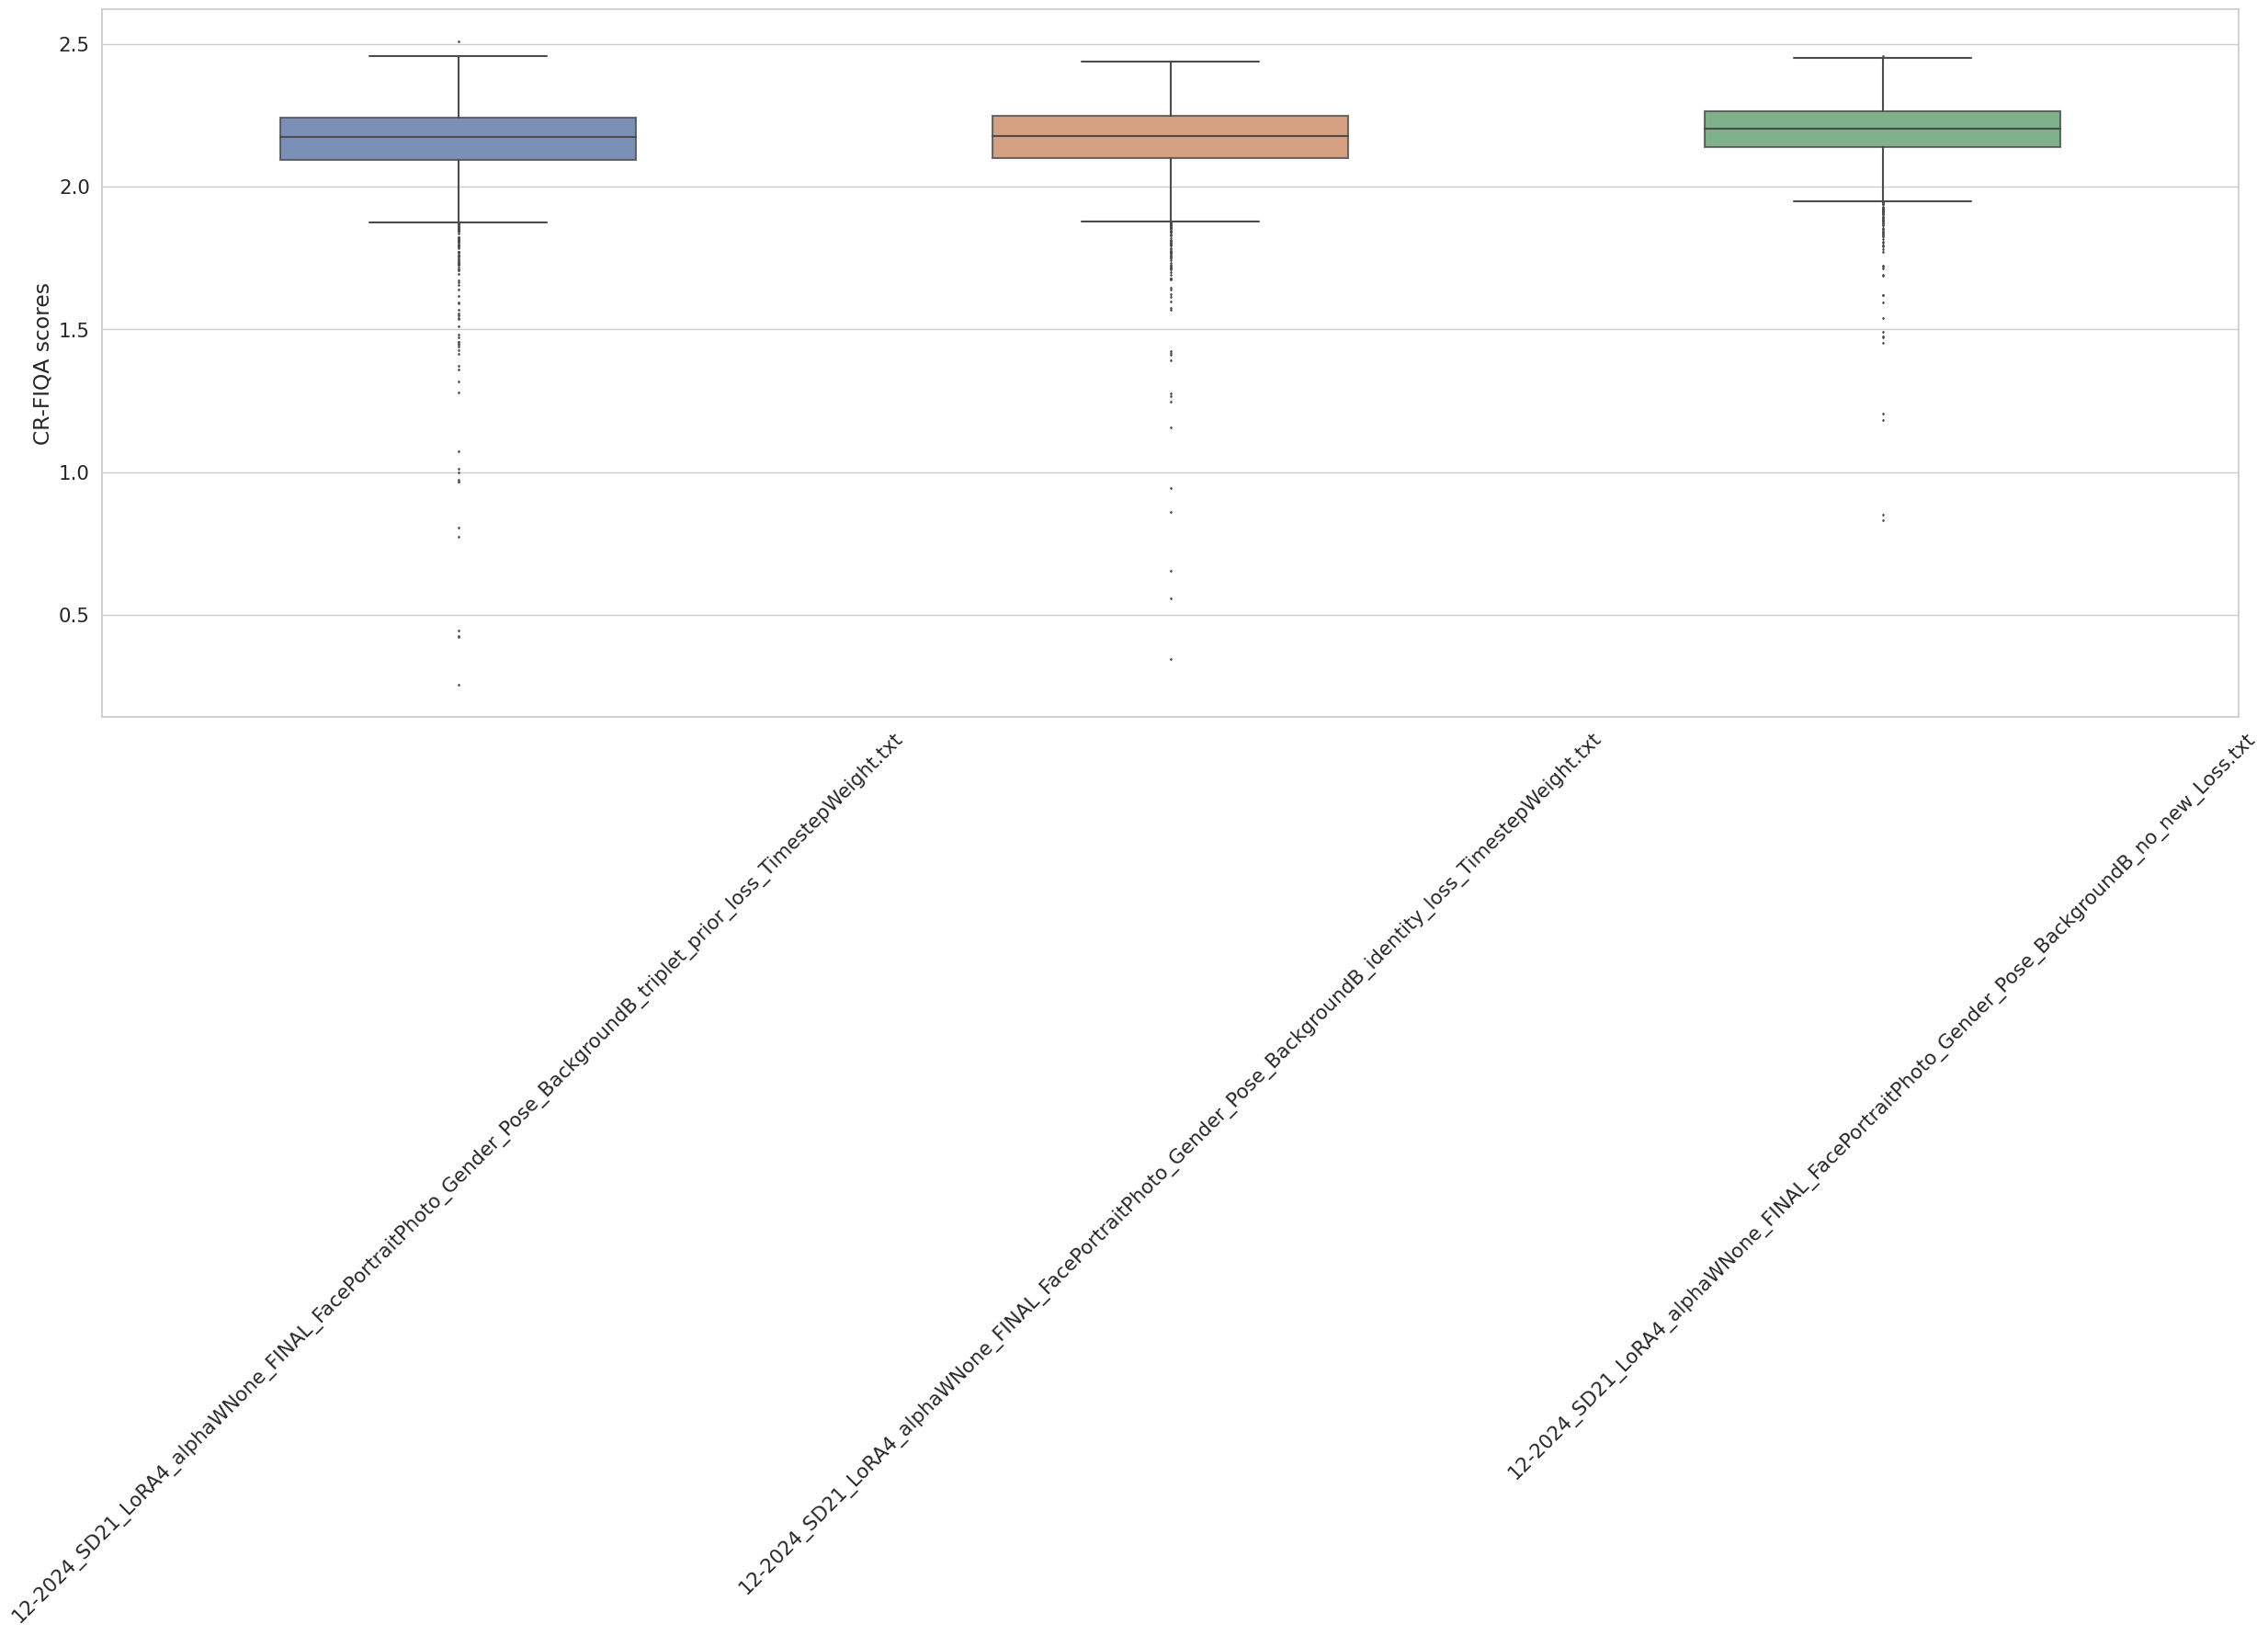

In [22]:

flierprops = dict(markerfacecolor='0.99', markersize=1,
              linestyle='none')

alpha = 0.8

ax = sns.boxplot(data=df, y="Scores", x="Class", flierprops=flierprops, boxprops=dict(alpha=alpha), width=0.5) # showfliers=False)#
ax.set(ylabel='CR-FIQA scores', xlabel='')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

#ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['A', 'B'], loc='upper right')

fig = ax.get_figure()
fig.tight_layout()
# fig.savefig("cr_fiqa_boxplots.pdf") 
    